## Dataset Description and Selection Criteria

The crime dataset that we chose has real data and is acquired from UCI Machine Learning repository where the title of the dataset is 'crime_data'. The dataset has large number of numerical columns which was the main reason for choosing such a dataset rather than a categorical one because it makes is easy to apply algorithms and avoids the hassle of conversion of categorical data to numerical data. The crime attributes in the dataset that could be predicted by applying various machine learning algorithms as considered are Rape, Murder, Larceny, Robbery, Assault, Burglaries, Autotheft and Arsons.

The other columns in the dataset include information about Arrest Type, Arrest Year, Arrest Date, Defendant Race, Defendant Ethnicity, Defendant Sex, Arrest Category and so on which are useful factors to predict crimes. We used some features as predictors from the dataset to train the different models and created a binary label to predict the Occurence of Crime based on the selected features. We also calculated various metrics like accuracy, f1 score, rms value, confusion matrix for the various clustering, regression and classification algorithms that we applied to the dataset.

Base and Enrichment Dataset Location: (https://opendata.dc.gov/datasets/adult-arrests/explore)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Loading the dataset into a Pandas Dataframe

In [2]:
df = pd.read_csv('crime_data.csv')
df.head()

,Arrest Year,Arrest Date,Arrest Hour,Age,Defendant Race,Defendant Ethnicity,Defendant Sex,Arrest Category,Offense Latitude,Offense Longitude
0,2021,1/1/21,0,38,BLACK,UNKNOWN,MALE,Damage to Property,38.927,-77.006
1,2021,1/1/21,0,31,BLACK,NOT HISPANIC,MALE,Simple Assault,38.925,-77.033
2,2021,1/1/21,0,35,BLACK,NOT HISPANIC,MALE,Weapon Violations,38.900,-76.930
3,2021,1/1/21,0,31,BLACK,NOT HISPANIC,MALE,Weapon Violations,38.849,-76.976
4,2021,1/1/21,0,21,BLACK,NOT HISPANIC,MALE,Weapon Violations,38.882,-76.925


In [3]:
df.shape

(15653, 10)

In [4]:
df.columns

Index(['Arrest Year', 'Arrest Date', 'Arrest Hour', 'Age', 'Defendant Race',
       'Defendant Ethnicity', 'Defendant Sex', 'Arrest Category',
       'Offense Latitude', 'Offense Longitude'],
      dtype='object')

In [5]:
df['Arrest Category'].unique()

array(['Damage to Property', 'Simple Assault', 'Weapon Violations',
       'Narcotics', 'Other Crimes', 'Driving/Boating While Intoxicated',
       'Traffic Violations', 'Sex Offenses', 'Theft', 'Property Crimes',
       'Release Violations/Fugitive (Warr)',
       'Release Violations/Fugitive (Fug)',
       'Offenses Against Family & Children', 'Liquor Law Violations',
       'Assault with a Dangerous Weapon', 'Homicide',
       'Assault on a Police Officer', 'Burglary', 'Vending Violations',
       'Robbery', 'Motor Vehicle Theft', 'Sex Abuse',
       'Aggravated Assault', 'Disorderly Conduct', 'Gambling',
       'Kidnapping', 'Fraud and Financial Crimes',
       'Fraud and Financial Crimes (Frau)', 'Theft from Auto',
       'Prostitution', 'Fraud and Financial Crimes (Forg)',
       'Fraud and Financial Crimes (Coun)'], dtype=object)

## Data Cleaning

The dataset 'crime_data.csv' was first loaded into a Pandas Dataframe and then some columns were renamed following appropriate naming conventions to make the data readable. Many columns had the character '?' which was replaced by 0 as part of data cleaning. Also, checks were placed to ensure that there were no '?' values at all after cleaning the data.

In [6]:
df = df.fillna(0)

In [7]:
df.isnull()

,Arrest Year,Arrest Date,Arrest Hour,Age,Defendant Race,Defendant Ethnicity,Defendant Sex,Arrest Category,Offense Latitude,Offense Longitude
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
15648,False,False,False,False,False,False,False,False,False,False
15649,False,False,False,False,False,False,False,False,False,False
15650,False,False,False,False,False,False,False,False,False,False
15651,False,False,False,False,False,False,False,False,False,False


In [8]:
df_sex = df.groupby('Defendant Sex').size().reset_index(name = 'Numbers')
df_sex

,Defendant Sex,Numbers
0,FEMALE,3423
1,MALE,12224
2,UNKNOWN,6


## Criteria Based Label Creation

After studying the dataset carefully, we found out that predicting the occurence of a crime's age could be a useful and valuable usecase. But, to do so we had to create a label named 'crime_occurence_age' based on the mean value from the column Age. After calculating the mean and comparing the mean values with the available values in the column 'Age', a decision 'yes' or '1' was made that a crime has occured if the value in the corresponding column was greater than the mean value or 'no' or '0' if the value was less than the mean. Hence, a binary variable was created.

In [9]:
crimes_age = list(map(float, df.Age))
crimes_mean = sum(crimes_age)/len(crimes_age)
crimes_mean

35.374177473966654

In [10]:
df['Age_mean'] = crimes_mean
df['crime_occurence_age'] = np.where(crimes_age>=df['Age_mean'], '1', '0')
df.groupby('crime_occurence_age').mean()

C:\Users\JNR_A_R_Y_A\AppData\Local\Temp\ipykernel_4456\2502579663.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('crime_occurence_age').mean()


,Arrest Year,Arrest Hour,Age,Offense Latitude,Offense Longitude,Age_mean
crime_occurence_age,,,,,,
0,2021.0,12.743929,26.988725,38.855876,-76.915434,35.374177
1,2021.0,12.925027,47.405195,38.824105,-76.849981,35.374177


## Data Slicing

In order to apply some clustering as well as classification algorithms, the data needed to be sliced in order to better vizualise it and hence a temporary dataframe was created in order to do so which contained a slice of the actual data.

In [11]:
df1 = df.iloc[:200]
df1.head(200)

,Arrest Year,Arrest Date,Arrest Hour,Age,Defendant Race,Defendant Ethnicity,Defendant Sex,Arrest Category,Offense Latitude,Offense Longitude,Age_mean,crime_occurence_age
0,2021,1/1/21,0,38,BLACK,UNKNOWN,MALE,Damage to Property,38.927,-77.006,35.374177,1
1,2021,1/1/21,0,31,BLACK,NOT HISPANIC,MALE,Simple Assault,38.925,-77.033,35.374177,0
2,2021,1/1/21,0,35,BLACK,NOT HISPANIC,MALE,Weapon Violations,38.900,-76.930,35.374177,0
3,2021,1/1/21,0,31,BLACK,NOT HISPANIC,MALE,Weapon Violations,38.849,-76.976,35.374177,0
4,2021,1/1/21,0,21,BLACK,NOT HISPANIC,MALE,Weapon Violations,38.882,-76.925,35.374177,0
...,...,...,...,...,...,...,...,...,...,...,...,...
195,2021,1/13/21,17,54,BLACK,NOT HISPANIC,MALE,Traffic Violations,38.905,-77.017,35.374177,1
196,2021,1/13/21,20,28,BLACK,NOT HISPANIC,MALE,Assault with a Dangerous Weapon,38.888,-76.919,35.374177,0
197,2021,1/13/21,20,33,BLACK,NOT HISPANIC,MALE,Damage to Property,38.845,-76.985,35.374177,0
198,2021,1/13/21,20,31,BLACK,NOT HISPANIC,MALE,Driving/Boating While Intoxicated,38.902,-76.942,35.374177,0


## Feature Selection for Clustering Algorithms

In [12]:
features = ['Offense Latitude', 'Offense Longitude']
X = df1[features].values
y = df1['crime_occurence_age'].astype(float).values

## Plotting the actual data to vizualize it

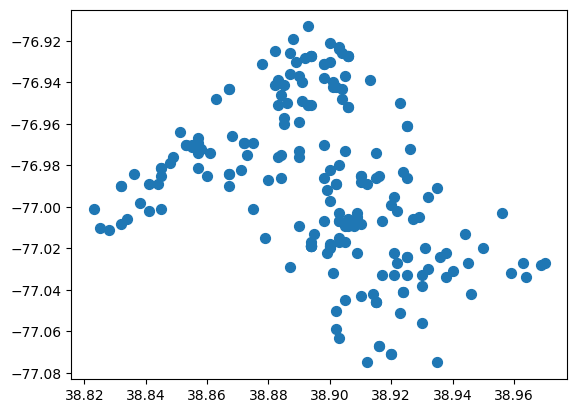

In [13]:
plt.scatter(X[:, 0], X[:, 1], s=50);

## Splitting the data

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Using the elbow method to find the optimal number of clusters

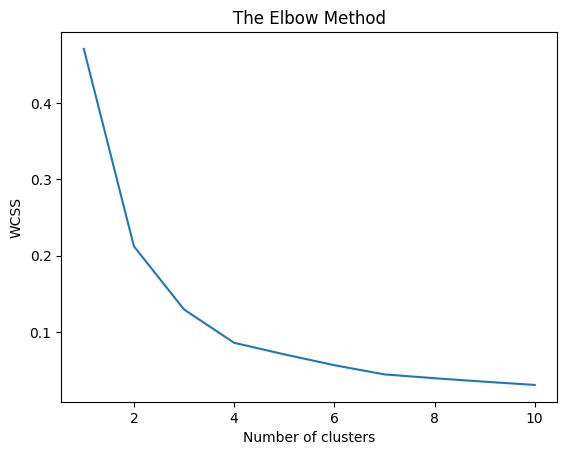

In [15]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans =KMeans(n_clusters =i, init = 'k-means++', max_iter =300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## Applying K-Means Algorithm

In [16]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_train)
y_pred = kmeans.predict(X_test)

## Vizualising the clusters

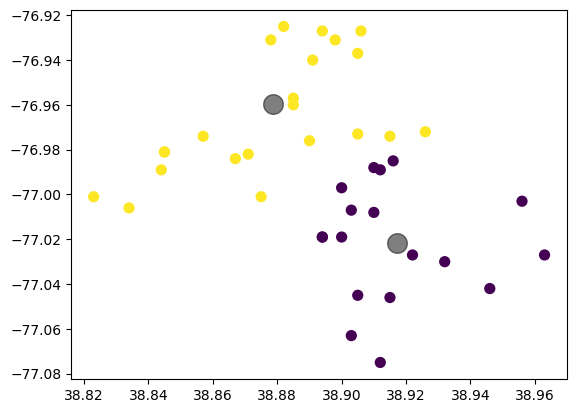

In [17]:
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

## Metrics Calculation

In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

kmeans_accuracy = accuracy_score(y_test, y_pred)
kmeans_precison=precision_score(y_test,y_pred,average=None)
kmeans_recall=recall_score(y_test,y_pred,average=None)
kmeans_f1=f1_score(y_test,y_pred,average=None)
kmeans_confusion_matrix = confusion_matrix(y_test, y_pred)

In [19]:
print("K-Means")
print("Scores")
print("Accuracy -->",kmeans_accuracy)
print("Precison -->",kmeans_precison)
print("Recall -->",kmeans_recall)
print("F1 -->",kmeans_f1)

print("Confusion Matrix")
print(kmeans_confusion_matrix)

K-Means
Scores
Accuracy --> 0.55
Precison --> [0.77777778 0.36363636]
Recall --> [0.5        0.66666667]
F1 --> [0.60869565 0.47058824]
Confusion Matrix
[[14 14]
 [ 4  8]]


## Applying GMM

### Data Cleaning

In [20]:
#converting huge ranges of data to average values
import re

def extractSubstring(myStr):
    if isinstance(myStr, float):
        return myStr  # Return the float value as is
    elif "-" in myStr:
        lowVal, hiVal = map(float, re.findall(r'\d+\.\d+|\d+', myStr))
        return (lowVal + hiVal) / 2
    else:
        return convert_to_float(myStr)

def convert_to_float(input_str):
    return float(input_str.replace(",", ""))

# Assuming 'df' is your DataFrame
df['Offense Latitude'] = df['Offense Latitude'].apply(extractSubstring)
df['Offense Longitude'] = df['Offense Longitude'].apply(extractSubstring)


### Feature selection

In [21]:
Features = ['Arrest Hour','Age']
X = df[Features].values

## Applying GMM

In [22]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3).fit(X)
labels = gmm.predict(X)

## Vizualising the clusters

Text(0.5, 1.0, 'GMM Clustering')

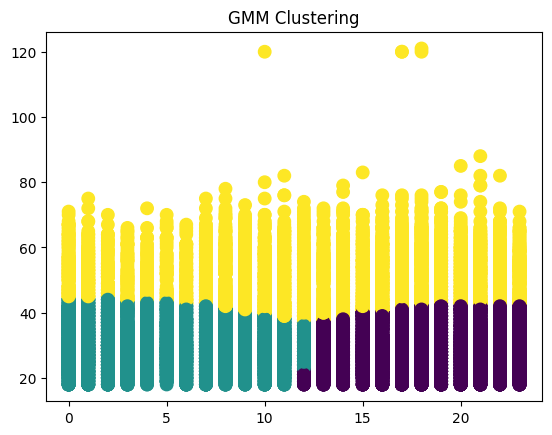

In [23]:
plt.scatter(X[:, 0], X[:, 1], c=labels, s=80, cmap='viridis');
plt.title("GMM Clustering")

## Linear Regression

### Feature Selection

In [24]:
X1 = df[['Arrest Hour']].astype(float).values
y1 = df['Age'].astype(int).values

### Splitting the data

In [25]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=0)

### Fitting the model

In [26]:
from sklearn import datasets, linear_model
regr = linear_model.LinearRegression()
regr.fit(X1_train, y1_train)

LinearRegression()

### Predicting the values

In [27]:
y_pred = regr.predict(X1_test)

### Vizualisation of plots

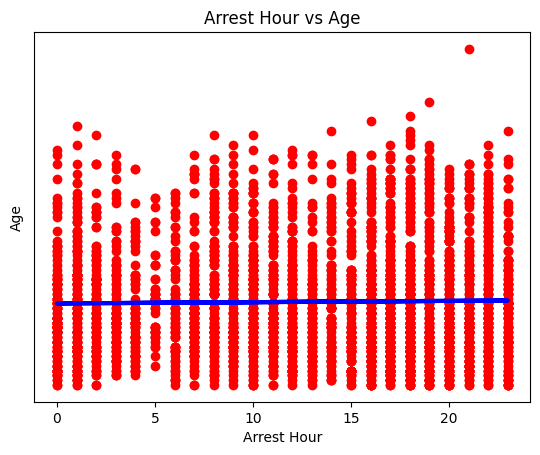

In [28]:
plt.scatter(X1_test, y1_test,  color='red')
plt.plot(X1_test, y_pred, color='blue', linewidth=3)

plt.title('Arrest Hour vs Age')
plt.xlabel('Arrest Hour')
plt.ylabel('Age')

plt.yticks(())
plt.show()

## Logistic Regression

In [29]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score


### Data Slicing

In [30]:
df1 = df.iloc[:200]

### Visualizing Selected Features by plotting their Histograms

In [31]:
df_age = df.groupby('Age').size().reset_index(name = 'Numbers')
df_age

,Age,Numbers
0,18,275
1,19,311
2,20,390
3,21,483
4,22,449
...,...,...
64,83,1
65,85,1
66,88,1
67,120,4


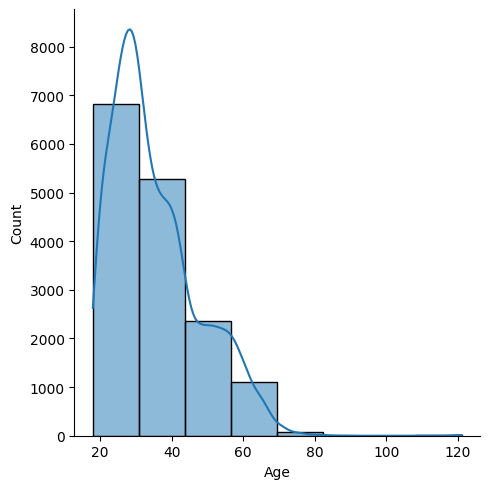

In [32]:
sns.displot(df['Age'], kde = True, bins = 8)

### Plotting the features to analyze the label and its frequency

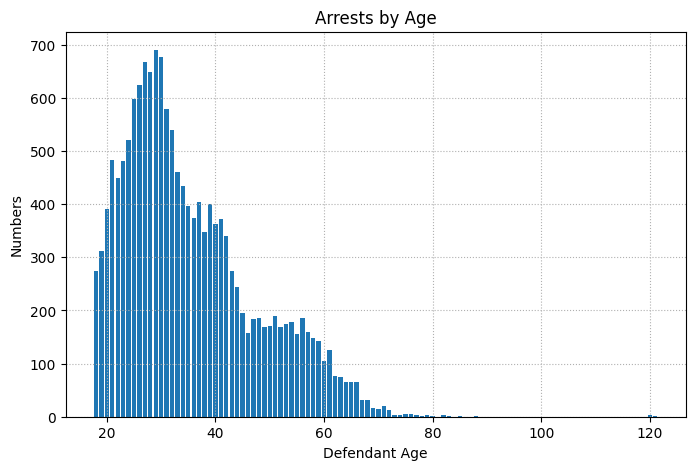

In [33]:
plt.figure(figsize = (8, 5))
plt.xlabel('Defendant Age')
plt.title('Arrests by Age')
plt.ylabel('Numbers')
x = df_age['Age']
y = df_age['Numbers']
plt.bar(x, y)
plt.grid(which = 'both', linestyle = ':')

In [34]:
X_LogReg= ['Age', 'Arrest Year', 'Arrest Hour', 'Offense Latitude', 'Offense Longitude']

In [35]:
y_LogReg = df1[['crime_occurence_age']]

### Training the Model

In [36]:
X_train_LogReg, X_test_LogReg, y_train_LogReg, y_test_LogReg = train_test_split(df1[X_LogReg], y_LogReg, test_size=0.2, random_state=0)

In [37]:
logreg = LogisticRegression()
logreg.fit(X_train_LogReg, y_train_LogReg)

c:\python 3.9\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

## Metrics

In [38]:
y_pred_LogReg = logreg.predict(X_test_LogReg)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test_LogReg, y_test_LogReg)))

Accuracy of logistic regression classifier on test set: 0.97


### Creating the Confusion Matrix to make further conclusion

Model Accuracy for Logistic Regression: 0.975


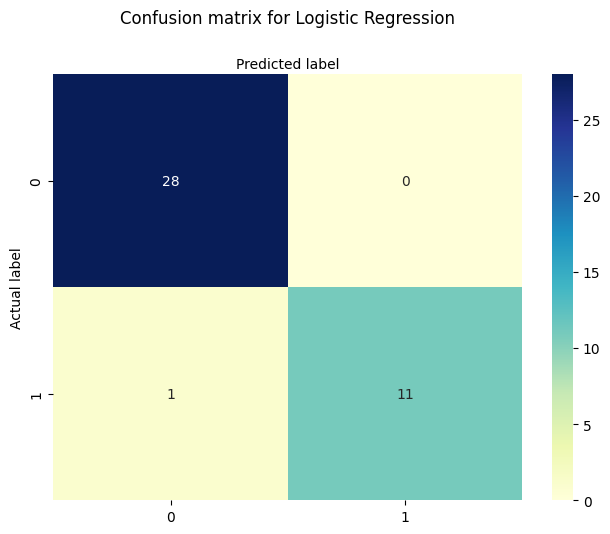

In [39]:
cnf_matrix_LogitRegression = metrics.confusion_matrix(y_test_LogReg, y_pred_LogReg)
cnf_matrix_LogitRegression

class_names=[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_LogitRegression), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for Logistic Regression', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print("Model Accuracy for Logistic Regression:",metrics.accuracy_score(y_test_LogReg, y_pred_LogReg))

## Decision Tree

Using Decision Tree Classifier from sklearn, we are trying to predict whether a crime has occured based on certain features or not and then calculating the accuracy of the decision tree classifier after training and testing the model.

In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

In [41]:
df = df[['Arrest Year', 'Arrest Hour', 'Age', 'Offense Latitude', 'Offense Longitude', 'crime_occurence_age']]
df = df
X_DecisionTree = df.drop('crime_occurence_age', axis=1)
Y_DecisionTree = df['crime_occurence_age']

In [42]:
from sklearn.model_selection import train_test_split
X_train_DecisionTree, X_test_DecisionTree, Y_train_DecisionTree, Y_test_DecisionTree = train_test_split(X_DecisionTree, Y_DecisionTree, random_state=1)

## Implementing Decision Tree Classifier

In [43]:
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,max_depth=20, min_samples_split=9, min_samples_leaf=6)
clf_gini

DecisionTreeClassifier(max_depth=20, min_samples_leaf=6, min_samples_split=9,
                       random_state=100)

In [44]:
clf_gini.fit(X_train_DecisionTree, Y_train_DecisionTree)

DecisionTreeClassifier(max_depth=20, min_samples_leaf=6, min_samples_split=9,
                       random_state=100)

In [45]:
Y_Pred_DecisionTree = clf_gini.predict(X_test_DecisionTree)
Y_Pred_DecisionTree

array(['1', '1', '1', ..., '1', '0', '0'], dtype=object)

## Metrics

In [46]:
ac=accuracy_score(Y_test_DecisionTree, Y_Pred_DecisionTree)*100
ac

100.0

## Plotting the tree

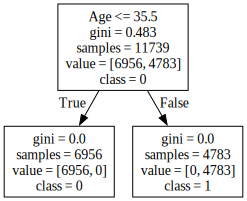

In [47]:
import graphviz 
dot_data = tree.export_graphviz(clf_gini, out_file=None, feature_names=X_DecisionTree.columns, class_names=['0','1'])
graph = graphviz.Source(dot_data) 
graph.render("crime") 
graph

## Confusion Matrix

Model Accuracy for Decision Tree: 1.0


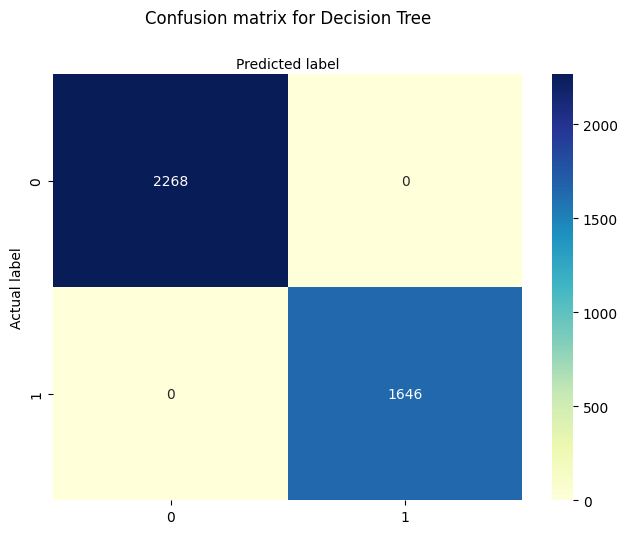

In [48]:
# For Decision Tree
cnf_matrix_DecisionTree = metrics.confusion_matrix(Y_test_DecisionTree, Y_Pred_DecisionTree)
cnf_matrix_DecisionTree
# name  of classes
class_names=[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_DecisionTree), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for Decision Tree', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print("Model Accuracy for Decision Tree:",metrics.accuracy_score(Y_test_DecisionTree, Y_Pred_DecisionTree))

## Gaussian Naive Bayes Classifier

## Label Creation

In [49]:
age = list(map(float, df.Age))
age_mean = sum(age)/len(age)
age_mean

35.374177473966654

In [50]:
df['mean_age'] = age_mean
df['Age_occurence'] = np.where(age>=df['mean_age'], 'yes', 'no')
df.groupby('Age_occurence').mean()

C:\Users\JNR_A_R_Y_A\AppData\Local\Temp\ipykernel_3116\2951576386.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Age_occurence').mean()


,Arrest Year,Arrest Hour,Age,Offense Latitude,Offense Longitude,mean_age
Age_occurence,,,,,,
no,2021.0,12.743929,26.988725,38.855876,-76.915434,35.374177
yes,2021.0,12.925027,47.405195,38.824105,-76.849981,35.374177


## Data Slicing

In [51]:
df1 = df.iloc[:700]

## Applying Gaussian NB classifier

In [52]:
X_NaiveBayes= ['Age','Arrest Hour', 'Offense Latitude','Offense Longitude']
Y_NaiveBayes = df1[['Age_occurence']]

In [53]:
X_train_NaiveBayes, X_test_NaiveBayes, Y_train_NaiveBayes, Y_test_NaiveBayes = train_test_split(df1[X_NaiveBayes], Y_NaiveBayes, test_size=0.2, random_state=0)

In [54]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [55]:
model.fit(X_train_NaiveBayes, Y_train_NaiveBayes)

c:\python 3.9\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GaussianNB()

## Model Accuracy

In [56]:
Y_Pred_NaiveBayes = model.predict(X_test_NaiveBayes)
print('Accuracy of Gaussian Naive Bayes classifier on test set: {:.2f}'.format(model.score(X_test_NaiveBayes, Y_test_NaiveBayes)))

Accuracy of Gaussian Naive Bayes classifier on test set: 0.99


## Corelation matrix showing the features

In [57]:
df1[X_NaiveBayes].corr()

,Age,Arrest Hour,Offense Latitude,Offense Longitude
Age,1.000000,0.068555,0.049672,-0.130302
Arrest Hour,0.068555,1.000000,0.029208,-0.071493
Offense Latitude,0.049672,0.029208,1.000000,-0.375405
Offense Longitude,-0.130302,-0.071493,-0.375405,1.000000


## Corelation Heatmap for better visualization

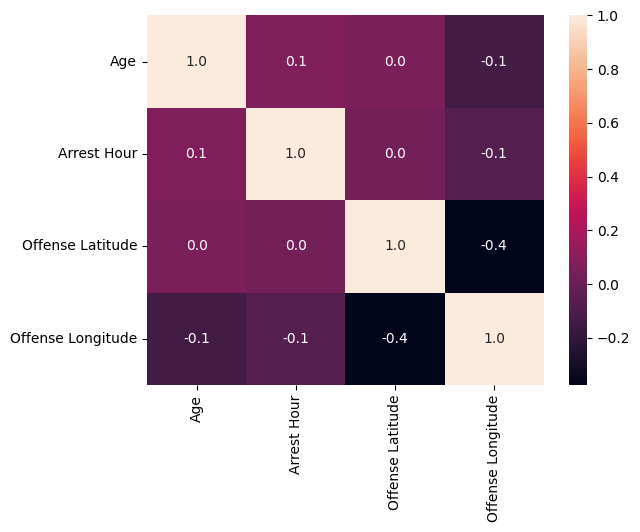

In [58]:
import seaborn as sns
sns.heatmap(df1[X_NaiveBayes].corr(), annot=True, fmt=".1f")
plt.show()

## Confusion Matrix

Model Accuracy for Gaussian Naive Bayes: 0.9928571428571429


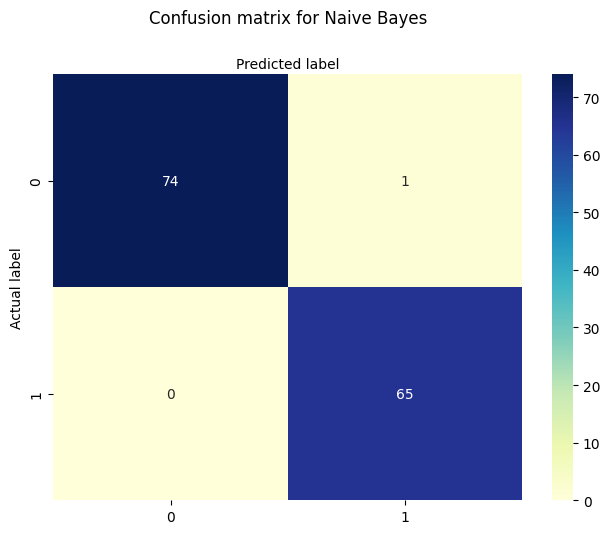

In [59]:
cnf_matrix_NaiveBayes = metrics.confusion_matrix(Y_test_NaiveBayes, Y_Pred_NaiveBayes)
cnf_matrix_NaiveBayes
# name  of classes
class_names=[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_NaiveBayes), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for Naive Bayes', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print("Model Accuracy for Gaussian Naive Bayes:",metrics.accuracy_score(Y_test_NaiveBayes, Y_Pred_NaiveBayes))

## Random Forest Classifier

## Label Creation

In [60]:
df['mean_age_crimes'] = age_mean
df['crime_occurence_age'] = np.where(age>=df['mean_age_crimes'], 'yes', 'no')
df.groupby('crime_occurence_age').mean()

C:\Users\JNR_A_R_Y_A\AppData\Local\Temp\ipykernel_3116\848525137.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('crime_occurence_age').mean()


,Arrest Year,Arrest Hour,Age,Offense Latitude,Offense Longitude,mean_age,mean_age_crimes
crime_occurence_age,,,,,,,
no,2021.0,12.743929,26.988725,38.855876,-76.915434,35.374177,35.374177
yes,2021.0,12.925027,47.405195,38.824105,-76.849981,35.374177,35.374177


## Feature Selection

In [61]:
df = df[['Arrest Year', 'Arrest Hour', 'Age', 'Offense Latitude', 'Offense Longitude', 'crime_occurence_age']]
df = df
X = df.drop('crime_occurence_age', axis=1)
y = df['crime_occurence_age']

In [62]:
X_train_RandomForest, X_test_RandomForest, Y_train_RandomForest, Y_test_RandomForest = train_test_split(X, y, random_state=1)

### Calculating gini index for Random Forest Classifier

In [63]:
from sklearn.ensemble import RandomForestClassifier
clf_gini = RandomForestClassifier(criterion = "gini",random_state = 200,max_depth=30, min_samples_split=9, min_samples_leaf=6)
clf_gini

RandomForestClassifier(max_depth=30, min_samples_leaf=6, min_samples_split=9,
                       random_state=200)

## Fitting and predicitng the model

In [64]:
clf_gini.fit(X_train_RandomForest, Y_train_RandomForest)

RandomForestClassifier(max_depth=30, min_samples_leaf=6, min_samples_split=9,
                       random_state=200)

In [65]:
Y_Pred_RandomForest = clf_gini.predict(X_test_RandomForest)

## Metrics

In [66]:
ac=accuracy_score(Y_test_RandomForest,Y_Pred_RandomForest)*100
ac

100.0

## Confusion Matrix

In [67]:
cnf_matrix_RandomForest = metrics.confusion_matrix(Y_test_RandomForest, Y_Pred_RandomForest)
cnf_matrix_RandomForest

array([[2268,    0],
       [   0, 1646]], dtype=int64)

Model Accuracy for Random Forest: 1.0


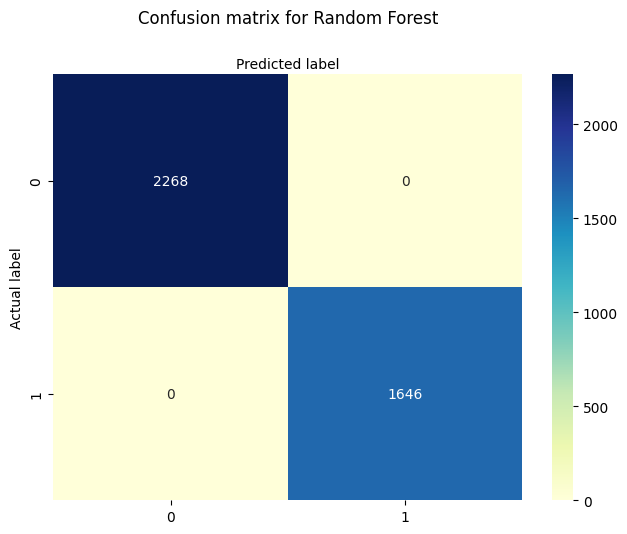

In [68]:
class_names=[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_RandomForest), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for Random Forest', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print("Model Accuracy for Random Forest:",metrics.accuracy_score(Y_test_RandomForest, Y_Pred_RandomForest))

## SVM

In [69]:
df = df[['Arrest Year', 'Arrest Hour', 'Age', 'Offense Latitude', 'Offense Longitude', 'crime_occurence_age']]
df = df

In [70]:
X_SVM = df.iloc[:, [3, 4]].values  # Selecting Offense Latitude and Offense Longitude columns
Y_SVM = df.iloc[:, 5].values  # Selecting crime_occurence_age column

### Splitting the dataset into the Training set and Test set

In [71]:
from sklearn.model_selection import train_test_split
X_train_SVM, X_test_SVM, Y_train_SVM, Y_test_SVM = train_test_split(X_SVM, Y_SVM, test_size = 0.30, random_state = 0)

## Feature Scaling

In [72]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_SVM = sc.fit_transform(X_train_SVM)
X_test_SVM = sc.transform(X_test_SVM)
print(X_train_SVM)

[[ 0.06639368 -0.05113853]
 [ 0.03690926 -0.02829877]
 [ 0.03690926 -0.00799677]
 ...
 [ 0.03619013 -0.05005092]
 [ 0.03834752 -0.04642556]
 [ 0.04410058 -0.0417126 ]]


## Training & fitting the model

In [73]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear',random_state = 0)
classifier.fit(X_train_SVM, Y_train_SVM)

SVC(kernel='linear', random_state=0)

In [74]:
Y_Pred_SVM = classifier.predict(X_test_SVM)

In [75]:
print(classifier.support_vectors_)

[[ 0.03690926 -0.02829877]
 [ 0.00382918 -0.02721116]
 [ 0.0110205  -0.02322327]
 ...
 [ 0.06639368 -0.05113853]
 [ 0.02684141 -0.03011145]
 [ 0.03834752 -0.04642556]]


## Confusion Matrix

Model Accuracy for SVM: 0.5813458262350937


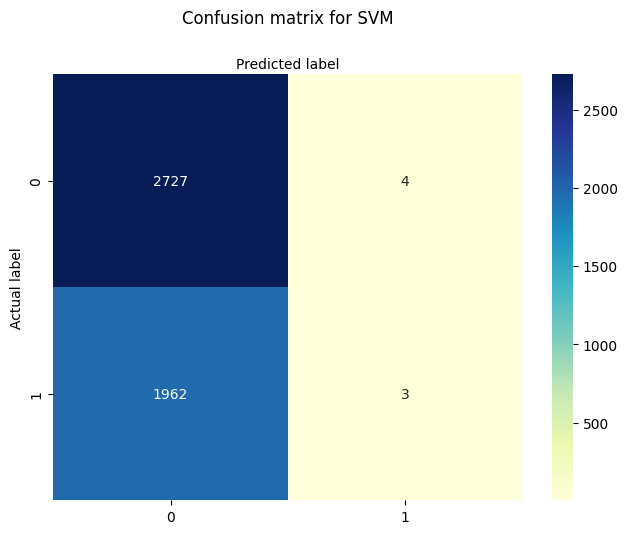

In [76]:
cnf_matrix_RandomForest = metrics.confusion_matrix(Y_test_SVM, Y_Pred_SVM)
cnf_matrix_RandomForest
# name  of classes
class_names=[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_RandomForest), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for SVM', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print("Model Accuracy for SVM:",metrics.accuracy_score(Y_test_SVM, Y_Pred_SVM))

## Accuracy

In [77]:
ac=accuracy_score(Y_test_SVM,Y_Pred_SVM)*100
ac

58.13458262350937

 ## Comparison Between Models

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


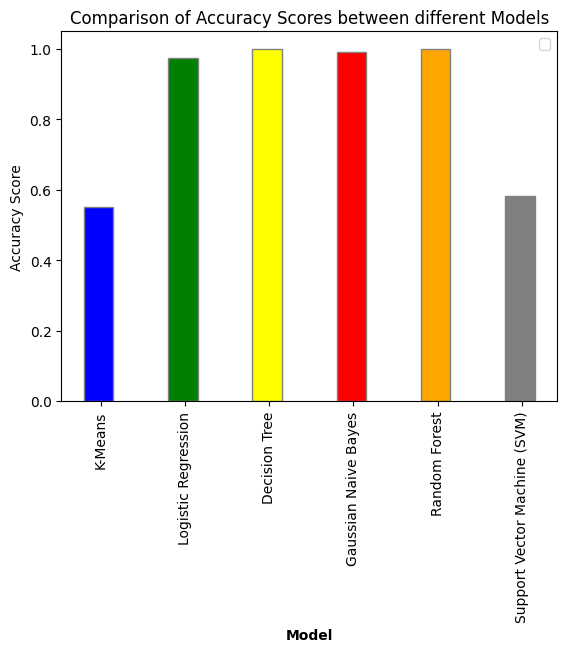

In [78]:
# Define the models and their performance metrics
models = ['K-Means', 'Logistic Regression', 'Decision Tree', 'Gaussian Naive Bayes', 'Random Forest', 'Support Vector Machine (SVM)']
accuracy = [ 0.55, 0.975, 1, 0.992, 1, 0.5813]

# Set the width of the bars
bar_width = 0.35

# Set the positions of the bars on the x-axis
r1 = np.arange(len(accuracy))


# Create the bar chart
plt.bar(r1, accuracy, color=['b', 'g', 'yellow', 'r', 'orange', 'grey'], width=bar_width, edgecolor='grey')

# Add xticks on the middle of the group bars
plt.xlabel('Model', fontweight='bold')
plt.ylabel('Accuracy Score')
plt.xticks([r1 + bar_width/15 for r1 in range(len(accuracy))], models, rotation=90)
plt.title('Comparison of Accuracy Scores between different Models')

# Add a legend
plt.legend()

# Show the plot
plt.show()


## Conclusion

The predictions made by various classification algorithms show the occurence possibility of a crime whether a crime will occur or not, if a crime occurs, will it be a violent or a non-violent crime or if a crime occurs, is the cause of the crime murder or not. These predictions might help the local police departments as well as the FBI solve many cases with esfficiency and accuracy.

Among the classification algorithms,Decision Tree and Random Forest Classifier performs the best making a decision based on majority vote and constructing a decision tree for each feature. The highest accuracy achieve with Decision Tree and Random Forest Classifier is 1.00%.